# # Import our Libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
%matplotlib inline
import os

# Changing Directory to import data set 

In [2]:
os.chdir(r"C:\Users\Ankit Dsouza\Desktop\Python Code") 

In [3]:
# load the data and replace the '..' with nan
econ_df = pd.read_excel('gpd_prediction.xlsx')
econ_df = econ_df.replace('..','nan')
# set the index to the year column
econ_df = econ_df.set_index('Year')
# set the data type and select rows up to 2016
econ_df = econ_df.astype(float)
econ_df = econ_df.loc['1969':'2016']

# Changing Column name

In [4]:
econ_df.columns

Index(['gdp_growth', 'gross_capital_formation', 'pop_growth', 'birth_rate',
       'broad_money_growth', 'final_consum_growth', 'gov_final_consum_growth',
       'gross_cap_form_growth', 'hh_consum_growth', 'unemployment'],
      dtype='object')

# Checking Missing Value

In [5]:
# check for nulls
econ_df.isnull().sum(axis = 0)

gdp_growth                 0
gross_capital_formation    0
pop_growth                 0
birth_rate                 0
broad_money_growth         0
final_consum_growth        0
gov_final_consum_growth    0
gross_cap_form_growth      0
hh_consum_growth           0
unemployment               0
dtype: int64

# Data Partition

In [6]:
# define our input variable (X) & output variable

X = econ_df.drop('gdp_growth', axis = 1)
Y = econ_df[['gdp_growth']]
# Split X and y into X_
X_train, X_test, y_train, y_test =train_test_split(X, Y, test_size=0.20,
                                                   random_state=1)

# Model Building

# Correlation Matrix 

In [7]:
econ_df1=pd.concat([y_train,X_train],axis=1)

,gdp_growth,gross_capital_formation,pop_growth,birth_rate,broad_money_growth,final_consum_growth,gov_final_consum_growth,gross_cap_form_growth,hh_consum_growth,unemployment
gdp_growth,1.000000,0.104711,0.577133,0.569042,0.312360,0.862195,0.092569,0.852379,0.878515,-0.216038
gross_capital_formation,0.104711,1.000000,-0.116695,-0.121824,-0.135948,0.307906,0.277231,0.141669,0.297928,-0.569541
pop_growth,0.577133,-0.116695,1.000000,0.979736,0.524675,0.508159,0.300214,0.383733,0.490806,0.224321
birth_rate,0.569042,-0.121824,0.979736,1.000000,0.520379,0.487728,0.302905,0.386733,0.469414,0.265149
broad_money_growth,0.312360,-0.135948,0.524675,0.520379,1.000000,0.302724,0.297538,0.249022,0.280291,0.297615
final_consum_growth,0.862195,0.307906,0.508159,0.487728,0.302724,1.000000,0.345633,0.744546,0.994399,-0.322985
gov_final_consum_growth,0.092569,0.277231,0.300214,0.302905,0.297538,0.345633,1.000000,0.078466,0.247448,-0.010499
gross_cap_form_growth,0.852379,0.141669,0.383733,0.386733,0.249022,0.744546,0.078466,1.000000,0.758793,-0.262096
hh_consum_growth,0.878515,0.297928,0.490806,0.469414,0.280291,0.994399,0.247448,0.758793,1.000000,-0.327459
unemployment,-0.216038,-0.569541,0.224321,0.265149,0.297615,-0.322985,-0.010499,-0.262096,-0.327459,1.000000


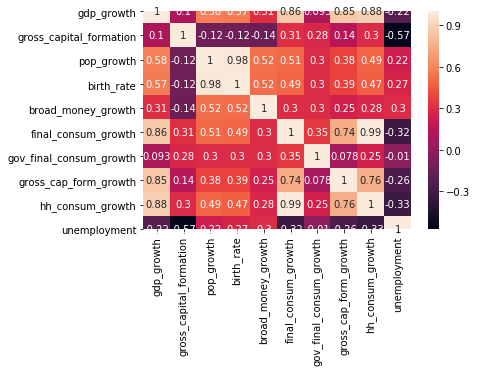

In [8]:
# calculate the correlation matrix
corr = econ_df1.corr()
# display the correlation matrix
display(corr)
# plot the correlation heatmap
sns.heatmap(corr,annot = True) # annot=True will give you value


# Model Building

In [9]:
# define our intput
X_1 = sm.add_constant(X_train)
# create a OLS model
model = sm.OLS(y_train, X_1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             gdp_growth   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     27.27
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           1.45e-11
Time:                        08:22:04   Log-Likelihood:                -68.019
No. Observations:                  38   AIC:                             156.0
Df Residuals:                      28   BIC:                             172.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


# Multicolinearity (with the help of VIF)

In [10]:
X1=econ_df1.drop(['gdp_growth'],axis=1)
# the VIF does expect a constant term in the data, 
#so we need to add one using the add_constant method
#X1 = sm.add_constant(econ_df_before)
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])], 
                          index=X1.columns)
series_before

gross_capital_formation      19.212176
pop_growth                  162.241884
birth_rate                  207.024778
broad_money_growth            4.512362
final_consum_growth        4851.838385
gov_final_consum_growth      98.964975
gross_cap_form_growth         4.026634
hh_consum_growth           3726.109127
unemployment                 19.176525
dtype: float64

# Removing the inSignificant variable  

* Variable will be remove based on P-value (>0.05) one by one

* Removing final_consum_growth with the help of P-value

In [11]:
X_train=X_train.drop(['final_consum_growth'],axis=1)

In [12]:
# define our intput
X2 = sm.add_constant(X_train)
# create a OLS model
model2 = sm.OLS(y_train, X2).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:             gdp_growth   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     31.77
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           2.47e-12
Time:                        08:22:04   Log-Likelihood:                -68.021
No. Observations:                  38   AIC:                             154.0
Df Residuals:                      29   BIC:                             168.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [13]:
X1=econ_df1.drop(['gdp_growth','final_consum_growth'],axis=1)
# the VFI does expect a constant term in the data, 
#so we need to add one using the add_constant method
#X1 = sm.add_constant(econ_df_before)
series_before =pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])], 
          index=X1.columns)
series_before

gross_capital_formation     18.875927
pop_growth                 161.972132
birth_rate                 205.702518
broad_money_growth           4.509515
gov_final_consum_growth      6.649093
gross_cap_form_growth        4.000155
hh_consum_growth             8.528824
unemployment                19.152951
dtype: float64

#  Removing birth_rate with the help of P-value

In [14]:
X_train=X_train.drop(['birth_rate'],axis=1)

In [15]:
# define our intput
X3 = sm.add_constant(X_train)
# create a OLS model
model3 = sm.OLS(y_train,X3).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:             gdp_growth   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     37.00
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           4.68e-13
Time:                        08:22:05   Log-Likelihood:                -68.276
No. Observations:                  38   AIC:                             152.6
Df Residuals:                      30   BIC:                             165.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [16]:
X1=econ_df1.drop(['gdp_growth','final_consum_growth',
                  'birth_rate'],axis=1)
# the VFI does expect a constant term in the data, 
#so we need to add one using the add_constant method
#X1 = sm.add_constant(econ_df_before)
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])], index=X1.columns)
series_before

gross_capital_formation    18.377418
pop_growth                 11.431435
broad_money_growth          4.498154
gov_final_consum_growth     6.610855
gross_cap_form_growth       3.858980
hh_consum_growth            8.466026
unemployment               17.235662
dtype: float64

# Data Partition

In [45]:
# define our input variable (X) & output variable

X = econ_df.drop('gdp_growth', axis = 1)
Y = econ_df[['gdp_growth']]
# Split X and y into X_
X_train, X_test, y_train, y_test =train_test_split(X, Y, test_size=0.20, random_state=1)

In [46]:
econ_df1=pd.concat([y_train,X_train],axis=1)

# Backward Elimination Method

In [47]:
X = econ_df1.drop('gdp_growth', axis = 1)
y = econ_df1['gdp_growth']

# Its work on dataframe

In [48]:
#Backward Elimination
cols = list(X.columns) # all column present  in x  
pmax = 1
while (len(cols)>0):  # count of variable should be greater than zero
    p= []
    X_1 = X[cols]  # all column we are assign in x_1
    X_1 = sm.add_constant(X_1)# adding a column with value 1
    final_model = sm.OLS(y,X_1).fit() # Regression model
    p = pd.Series(final_model.pvalues.values[1:],index = cols) 
    # to get p-values for all variable only     
    pmax = max(p)  # select a max P-value 
    feature_with_p_max = p.idxmax()   
    # idmax is used to display the variable name which has max P-value
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['birth_rate', 'gov_final_consum_growth', 'gross_cap_form_growth', 'hh_consum_growth']


In [49]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             gdp_growth   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     69.81
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           1.24e-15
Time:                        08:25:22   Log-Likelihood:                -68.618
No. Observations:                  38   AIC:                             147.2
Df Residuals:                      33   BIC:                             155.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       1.8413      0.778      2.368      0.024       0.259       3.423
birth_rate                  0.1510      0.046      3.290      0.002       0.058       0.244
gov_final_consum_growth    -0.2222      0.103     -2.147      0.039      -0.433      -0.012
gross_cap_form_growth       0.1328      0.030      4.384      0.000       0.071       0.194
hh_consum_growth            0.5202      0.094      5.517      0.000       0.328       0.712
==============================================================================
Omnibus:                        0.736   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.692   Jarque-Bera (JB):                0.825
Skew:                           0.263   Prob(JB):                        0.662
Kurtosis:                       2.505   Cond. No.                         72.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Vif of Model

In [61]:
X1=econ_df1.loc[:,['birth_rate','hh_consum_growth',
                   'gov_final_consum_growth','gross_cap_form_growth']]
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])], index=X1.columns)
series_before

birth_rate                 6.259384
hh_consum_growth           6.962436
gov_final_consum_growth    4.903463
gross_cap_form_growth      3.825839
dtype: float64

# Assumption of Model

* Linearity
* Normality
* Homoscedasicity
* Model Error has to be independently identificaly Distibuted

# Homoscedasicity 

In [54]:
Data=pd.concat([X_train,y_train],axis=1)

In [55]:
Data['Fitted_value']=final_model.fittedvalues
Data['Residual']=final_model.resid

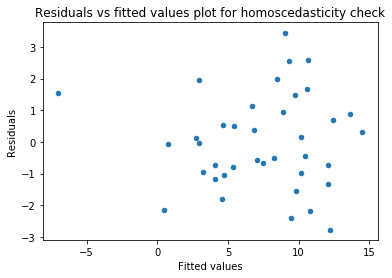

In [56]:
p = Data.plot.scatter(x='Fitted_value',y='Residual')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')
plt.show()

 The null hypothesis for  Breusch-Pagan test is that :

* H0 = σ2i = σ2 (the variances for the errors are equal)

The alternate hypothesis (the one you’re testing), is that :

* H1 = σ2i ≠ σ2 (the variances are not equal)

In [57]:
# Run the Breusch-Pagan test
_, pval2, __, f_pval2 = diag.het_breuschpagan(final_model.resid,
                                              final_model.model.exog)
print(pval2, f_pval2)

0.25145186348037096 0.26978677175560384


# Normality

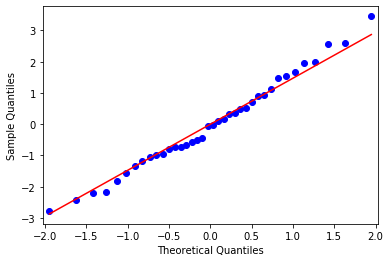

In [58]:
import pylab
# check for the normality of the residuals
sm.qqplot(final_model.resid, line='s')
pylab.show()

# Model Error are IID 

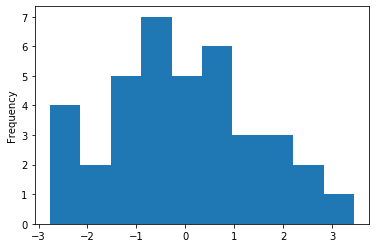

In [59]:
Data['Residual'].plot.hist()

# Prediction on Test Data (unseen data)

In [62]:
X_test2 = X_test[['birth_rate','hh_consum_growth',
                   'gov_final_consum_growth','gross_cap_form_growth']]

In [63]:
X_test2 = sm.add_constant(X_test2)

In [64]:
X_test2.head()

,const,birth_rate,hh_consum_growth,gov_final_consum_growth,gross_cap_form_growth
Year,,,,,
2002,1.0,10.2,8.880712,5.607038,7.297822
1992,1.0,16.7,6.853033,6.436623,0.106136
2007,1.0,10.0,5.098033,6.061820,4.531682
2005,1.0,8.9,4.419130,4.529687,2.417118
1971,1.0,31.2,9.426969,8.610547,15.172870


In [65]:
y_predict=final_model.predict(X_test2)

In [66]:
test=pd.concat([X_test,y_test],axis=1)

In [67]:
test['Predicted']=y_predict

In [68]:
test.head()

,gross_capital_formation,pop_growth,birth_rate,broad_money_growth,final_consum_growth,gov_final_consum_growth,gross_cap_form_growth,hh_consum_growth,unemployment,gdp_growth,Predicted
Year,,,,,,,,,,,
2002,30.939581,0.577957,10.2,13.999891,8.284738,5.607038,7.297822,8.880712,3.300,7.432434,5.949107
1992,38.485198,1.039161,16.7,14.941525,6.777232,6.436623,0.106136,6.853033,2.513,6.175506,3.749712
2007,32.579531,0.505234,10.0,10.819965,5.298003,6.061820,4.531682,5.098033,3.200,5.463396,5.380692
2005,32.163065,0.211998,8.9,6.989059,4.441178,4.529687,2.417118,4.419130,3.700,3.923677,4.061964
1971,25.558501,1.971324,31.2,20.844481,9.330434,8.610547,15.172870,9.426969,4.570,10.454693,13.493902


# Performance on Test Data set

In [69]:
import math
# calculate the mean squared error
model_mse = mean_squared_error(test['gdp_growth'], test['Predicted'])
# calculate the mean absolute error
model_mae = mean_absolute_error(test['gdp_growth'], test['Predicted'])
# calulcate the root mean squared error
model_rmse = math.sqrt(model_mse)
# display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 8.48
MAE 1.86
RMSE 2.91


# Performance on Training Data set

In [70]:
import math
# calculate the mean squared error
model_mse = mean_squared_error(Data['gdp_growth'], Data['Fitted_value'])
# calculate the mean absolute error
model_mae = mean_absolute_error(Data['gdp_growth'], Data['Fitted_value'])
# calulcate the root mean squared error
model_rmse = math.sqrt(model_mse)
# display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 2.17
MAE 1.21
RMSE 1.47
